## 膨胀与腐蚀
[OpenCV 图像处理之膨胀与腐蚀](https://zhuanlan.zhihu.com/p/110330329)  
[OpenCV图像腐蚀和膨胀、开操作、闭操作、形态学梯度、顶帽和黑帽](https://blog.csdn.net/qq_55025358/article/details/124221743)


In [1]:
import cv2
import numpy as np
from l_utils import plt_show_bgr

In [2]:
img = cv2.imread('../img/erode.JPG')
img_hp = cv2.imread('../img/hb.jpg')
img_dg = cv2.imread('../img/dg.jpg')

### 腐蚀操作

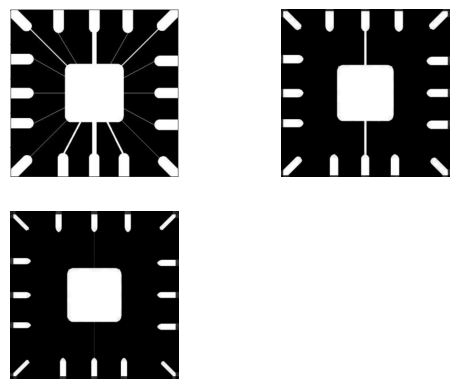

In [3]:
kernel = np.ones((5, 5), np.uint8)
erosion1 = cv2.erode(img, kernel, iterations=1)
erosion2 = cv2.erode(img, kernel, iterations=2)

plt_show_bgr((img, erosion1, erosion2))

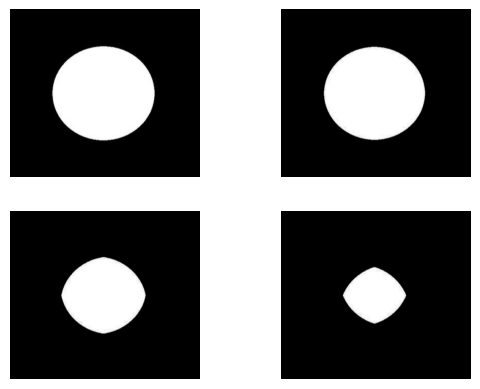

In [4]:
kernel = np.ones((3, 3), np.uint8)
erosion1 = cv2.erode(img_hp, kernel, iterations=1)
erosion16 = cv2.erode(img_hp, kernel, iterations=16)
erosion32 = cv2.erode(img_hp, kernel, iterations=32)

plt_show_bgr((img_hp, erosion1, erosion16, erosion32))

## 膨胀操作

(331, 374, 3) (254, 359, 3)


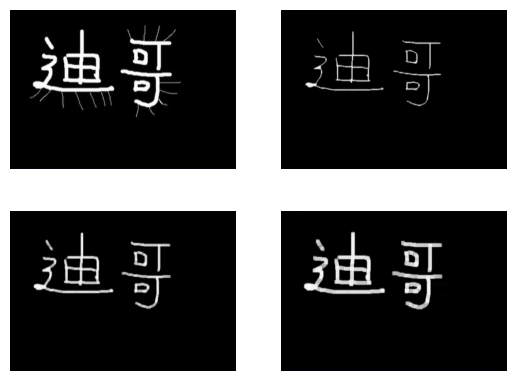

In [5]:

kernel_d = np.ones((3, 3), np.uint8)
dg_erosion = cv2.erode(img_dg, kernel, iterations=2)
dilate_1 = cv2.dilate(dg_erosion, kernel_d, iterations=1)
dilate_3 = cv2.dilate(dg_erosion, kernel_d, iterations=2)

print(img_hp.shape, dilate_1.shape)
plt_show_bgr((img_dg, dg_erosion, dilate_1, dilate_3))

### 开运算
先腐蚀后膨胀

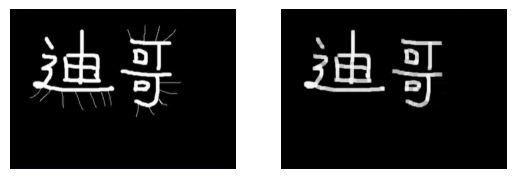

In [6]:
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img_dg, cv2.MORPH_OPEN, kernel)

plt_show_bgr((img_dg, opening))


### 闭运算
先膨胀后腐蚀

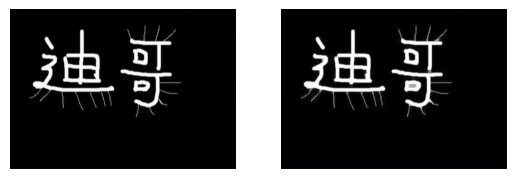

In [10]:
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(img_dg, cv2.MORPH_CLOSE, kernel)

plt_show_bgr((img_dg, closing))

### 梯度运算
梯度=膨胀-腐蚀

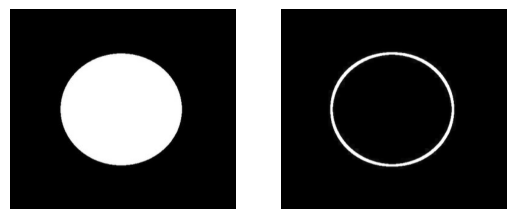

In [12]:
gradient = cv2.morphologyEx(img_hp, cv2.MORPH_GRADIENT, kernel)
plt_show_bgr((img_hp, gradient))

### 礼帽和黑帽
* 礼帽=原始输入-开运算结果
* 黑帽=闭运算-原始输入

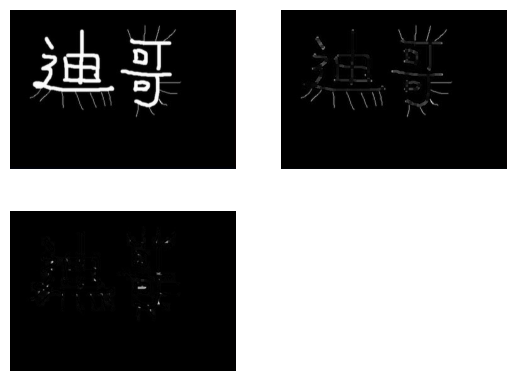

In [11]:
tophat = cv2.morphologyEx(img_dg, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img_dg, cv2.MORPH_BLACKHAT, kernel)

plt_show_bgr((img_dg, tophat, blackhat))